In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Configuration ---
# Set the style for our plots to make them look nice
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 8)
plt.rcParams["font.size"] = 12

# Define the path to your analysis file
# The filename is the one you provided.
file_path = "outputs/analysis_Phi-4-reasoning_20250621_123636.json"

print(f"Ready to analyze file: {file_path}")

Ready to analyze file: outputs/analysis_Phi-4-reasoning_20250621_102930.json


In [2]:
# Load the JSON data into a pandas DataFrame for easy manipulation

try:
    with open(file_path, "r") as f:
        data = json.load(f)
    
    # Convert the list of dictionaries directly into a DataFrame
    df = pd.DataFrame(data)
    avg_variance = df['variance'].mean()
    
    print("File loaded successfully!")
    print(f"Total number of generated tokens: {len(df)}")
    print(f"Average variance: {avg_variance:.2e}")
    
    
    # Display the first few rows to verify the structure
    print("\nData Head:")
    display(df.head())
    
    # Display summary information about the DataFrame
    print("\nData Info:")
    df.info()

except FileNotFoundError:
    print(f"ERROR: The file was not found at {file_path}")
    print("Please make sure the filename and path are correct.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
Total number of generated tokens: 5317
Average variance: 7.32e-06

Data Head:


step chosen_token  chosen_token_prob  variance   entropy  \
0     1          sum           0.451041  0.000004  1.289804   
1     2           is           0.198341  0.000001  2.532810   
2     3     achieved           0.410026  0.000004  1.209898   
3     4           if           0.306540  0.000004  1.033370   
4     5           we           0.415130  0.000003  1.419315   

                                   top_k_predictions  
0  [{'token': ' sum', 'probability': 0.4510409235...  
1  [{'token': ' is', 'probability': 0.19834101200...  
2  [{'token': ' achieved', 'probability': 0.41002...  
3  [{'token': ' when', 'probability': 0.505398571...  
4  [{'token': ' we', 'probability': 0.41513022780...


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               5317 non-null   int64  
 1   chosen_token       5317 non-null   object 
 2   chosen_token_prob  5317 non-null   float64
 3   variance           5317 non-null   float64
 4   entropy            5317 non-null   float64
 5   top_k_predictions  5317 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 249.4+ KB


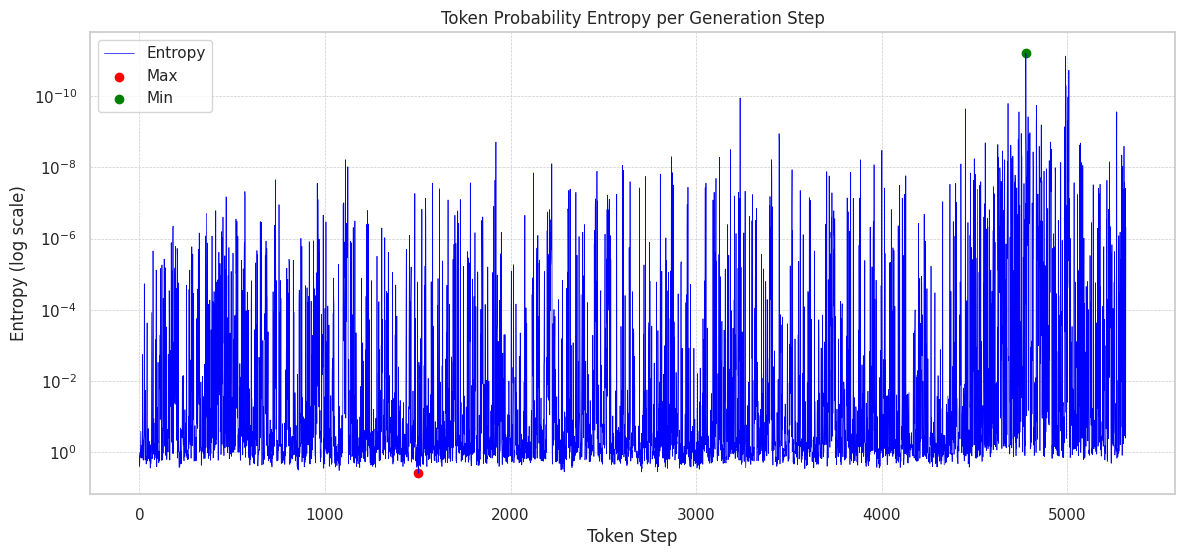

In [3]:
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(14, 6))
    plt.plot(
        df.index,
        df['entropy'],
        label='Entropy',
        color='blue',
        linewidth=0.5  # Make the line thin
    )
    plt.yscale('log')
    plt.gca().invert_yaxis()  # Flip the y-axis
    plt.xlabel('Token Step')
    plt.ylabel('Entropy (log scale)')
    plt.title('Token Probability Entropy per Generation Step')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Highlight max and min variance points
    max_idx = df['entropy'].idxmax()
    min_idx = df['entropy'].idxmin()
    plt.scatter([max_idx], [df.loc[max_idx, 'entropy']], color='red', label='Max')
    plt.scatter([min_idx], [df.loc[min_idx, 'entropy']], color='green', label='Min')
    plt.legend()
    plt.savefig("entropy_plot.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [4]:
if 'df' in locals() and not df.empty:
    plt.figure(figsize=(1400, 6))
    plt.plot(df.index, df['variance'], label='Variance', color='blue')
    plt.yscale('log')
    plt.xlabel('Token Step')
    plt.ylabel('Variance (log scale)')
    plt.title('Token Probability Variance per Generation Step')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Highlight max and min variance points
    max_idx = df['variance'].idxmax()
    min_idx = df['variance'].idxmin()
    plt.scatter([max_idx], [df.loc[max_idx, 'variance']], color='red', label='Max')
    plt.scatter([min_idx], [df.loc[min_idx, 'variance']], color='green', label='Min')
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [5]:
# Show the 1st, 5th, and 40th percentile (lowest) variance values in scientific notation

if 'df' in locals() and not df.empty:
    percentiles = [0.01, 0.05, 0.40]
    percentile_labels = ['1st', '5th', '40th']
    values = df['entropy'].quantile(percentiles)

    
    print("Entropy percentiles (lowest):")
    for label, val in zip(percentile_labels, values):
        print(f"{label} percentile: {val:.2e}")
else:
    print("DataFrame 'df' not available. Please run the previous cell successfully.")

Entropy percentiles (lowest):
1st percentile: 6.09e-09
5th percentile: 3.12e-07
40th percentile: 1.29e-01


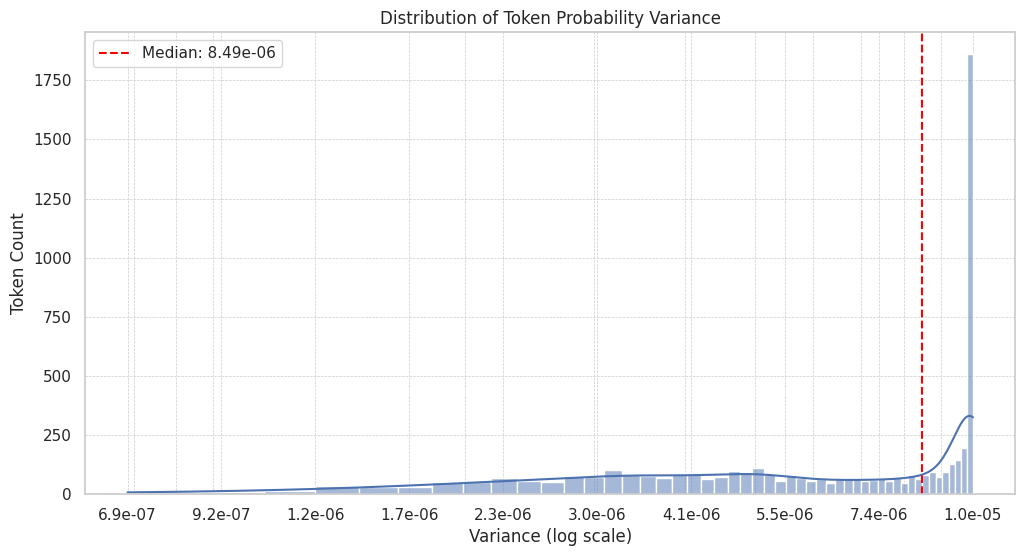

In [6]:
import numpy as np

if 'df' in locals() and not df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['variance'], bins=50, kde=True)
    plt.xscale('log')
    plt.xlabel('Variance (log scale)')
    plt.ylabel('Token Count')
    plt.title('Distribution of Token Probability Variance')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Add more ticks on the log x-axis
    min_var = df['variance'].min()
    max_var = df['variance'].max()
    ticks = np.logspace(np.log10(min_var), np.log10(max_var), num=10)
    plt.xticks(ticks, [f"{t:.1e}" for t in ticks])
    
    # Add median line
    median_var = df['variance'].median()
    plt.axvline(median_var, color='red', linestyle='--', label=f"Median: {median_var:.2e}")
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

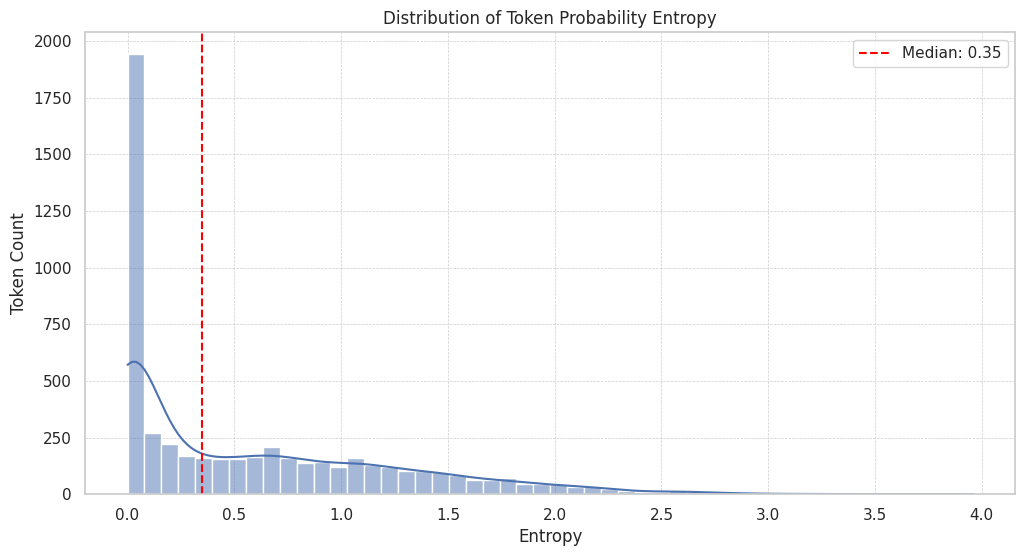

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'df' in locals() and not df.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(df['entropy'], bins=50, kde=True)
    # plt.xscale('log')  # <-- Removed for linear scale
    plt.xlabel('Entropy')
    plt.ylabel('Token Count')
    plt.title('Distribution of Token Probability Entropy')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    
    # Use default linear ticks, or set manually if you want:
    # min_var = df['entropy'].min()
    # max_var = df['entropy'].max()
    # ticks = np.linspace(min_var, max_var, num=10)
    # plt.xticks(ticks, [f"{t:.2f}" for t in ticks])
    
    # Add median line
    median_var = df['entropy'].median()
    plt.axvline(median_var, color='red', linestyle='--', label=f"Median: {median_var:.2f}")
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available.")

In [ ]:
import matplotlib.pyplot as plt

# Ask the user for the window size k
k = int(input("Enter window size k: "))

if 'df' in locals() and not df.empty and 'entropy' in df.columns:
    # Compute rolling mean (moving average) with window size k
    rolling_entropy = df['entropy'].rolling(window=k).mean()

    plt.figure(figsize=(14, 6))
    plt.plot(df.index, rolling_entropy, label=f'Rolling mean entropy (window={k})', color='purple')
    plt.xlabel('Token Step')
    plt.ylabel('Mean Entropy')
    plt.title(f'Rolling Mean Entropy of Probability Distribution (k={k})')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.show()
else:
    print("DataFrame 'df' not available or missing 'entropy' column.")

In [8]:
# --- Show the top 50 tokens by model probability at the step where a specified token was generated ---

token_of_interest = input("Enter part or all of the token to inspect: ").strip()

matches = df[df['chosen_token'].str.contains(token_of_interest, regex=False)]
if matches.empty:
    print(f"No generated token contains: '{token_of_interest}'")
else:
    print(f"Found {len(matches)} matches for '{token_of_interest}':")
    for i, (_, row) in enumerate(matches.iterrows(), 1):
        print(f"\nOccurrence {i}: Step {row['step']} (chosen_token: {row['chosen_token']!r}, entropy={row['entropy']:.2e}, variance={row['variance']:.2e})")
        top_preds = pd.DataFrame(row['top_k_predictions'])
        display(top_preds.sort_values('probability', ascending=False).reset_index(drop=True))

Enter part or all of the token to inspect:  valid


Found 2 matches for 'valid':

Occurrence 1: Step 856 (chosen_token: ' valid', entropy=3.23e+00, variance=8.26e-07)


token  probability
0           distinct     0.151704
1               unit     0.059408
2        differences     0.052427
3                  "     0.046267
4            denomin     0.043464
5              recip     0.040831
6               also     0.038357
7                not     0.036033
8            exactly     0.033850
9               sums     0.031799
10          realized     0.029872
11          possible     0.028062
12               all     0.026362
13        partitions     0.026362
14               the     0.024765
15             valid     0.023265
16          Egyptian     0.023265
17                       0.020531
18               sum     0.019287
19         solutions     0.017021
20         partition     0.015989
21         different     0.010989
22             equal     0.010324
23                in     0.009111
24          harmonic     0.008559
25                of     0.007553
26                 a     0.007095
27          actually     0.006262
28            actual     0.006262
29         represent     0.005882
30          pairwise     0.005526
31             known     0.004877
32       represented     0.004877
33               non     0.004304
34            unique     0.004043
35   representations     0.004043
36             exact     0.003798
37       consecutive     0.003798
38          solution     0.002452
39             decom     0.002452
40        arithmetic     0.002452
41           allowed     0.002304
42    simultaneously     0.002164
43        reciprocal     0.002033
44            proper     0.001583
45                ar     0.001397
46    representation     0.001397
47          uniquely     0.001397
48                an     0.001312
49              less     0.001233


Occurrence 2: Step 4512 (chosen_token: ' valid', entropy=1.22e+00, variance=3.64e-06)


token  probability
0                  a     0.428252
1         partitions     0.333523
2              valid     0.095556
3             actual     0.065675
4                 an     0.057958
5         arithmetic     0.007844
6            genuine     0.002886
7             viable     0.001750
8          partition     0.001363
9                any     0.001203
10          feasible     0.001062
11               the     0.000937
12              such     0.000443
13        legitimate     0.000391
14          possible     0.000268
15                ad     0.000237
16             decom     0.000072
17          disjoint     0.000068
18        achievable     0.000039
19          actually     0.000034
20        successful     0.000032
21         arbitrary     0.000027
22          suitable     0.000025
23            attain     0.000023
24         geometric     0.000018
25         allowable     0.000018
26                ar     0.000016
27          explicit     0.000016
28         effective     0.000015
29       permissible     0.000013
30            proper     0.000012
31              sets     0.000012
32        compatible     0.000010
33          mutually     0.000009
34      simultaneous     0.000008
35        acceptable     0.000008
36              real     0.000006
37       appropriate     0.000006
38         solutions     0.000004
39               til     0.000004
40      arrangements     0.000004
41   representations     0.000004
42              bona     0.000004
43                 (     0.000003
44               all     0.000003
45              comb     0.000003
46          complete     0.000003
47              ways     0.000003
48         genuinely     0.000002
49         divisions     0.000002